In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib as mpl
import seaborn as sns

from definitions import RAW_DATA_DIR

btcusdt = pd.read_csv(RAW_DATA_DIR / 'BTCUSDT.csv')
btcusdt.index = pd.DatetimeIndex(btcusdt['open time'])
btcusdt.head()

,open time,open,high,low,close,volume
open time,,,,,,
2017-08-17 20:30:00,2017-08-17 20:30:00,4301.91,4354.84,4262.53,4346.74,15.184266
2017-08-17 21:00:00,2017-08-17 21:00:00,4346.74,4369.69,4315.85,4349.33,29.292665
2017-08-17 21:30:00,2017-08-17 21:30:00,4349.33,4369.69,4309.23,4333.55,32.480371
2017-08-17 22:00:00,2017-08-17 22:00:00,4333.55,4349.63,4310.00,4326.29,26.241174
2017-08-17 22:30:00,2017-08-17 22:30:00,4326.29,4359.13,4319.11,4336.80,31.134968


In [2]:
fin_data = btcusdt[-100:]
fin_data.index = pd.DatetimeIndex(fin_data['open time'])
fin_data = fin_data.drop(columns=['open time'])
fin_data['indicator'] = np.random.uniform(low=0, high=1, size=fin_data.shape[0])
fin_data['stoch_k'] = np.random.uniform(low=0, high=1, size=fin_data.shape[0])
fin_data['stoch_d'] = np.random.uniform(low=0, high=1, size=fin_data.shape[0])
fin_data

,open,high,low,close,volume,indicator,stoch_k,stoch_d
open time,,,,,,,,
2021-05-29 22:00:00,34650.08,34651.73,34280.56,34391.43,1541.432189,0.175566,0.593331,0.817495
2021-05-29 22:30:00,34391.36,34582.43,34235.93,34467.84,893.928171,0.669623,0.333774,0.738380
2021-05-29 23:00:00,34468.95,35000.21,34137.09,34835.08,1892.226190,0.525042,0.406958,0.705066
2021-05-29 23:30:00,34835.07,35100.00,34463.39,34605.15,1888.368794,0.726396,0.895689,0.106531
2021-05-30 00:00:00,34605.15,34616.26,33781.98,33912.78,2545.248521,0.431384,0.314357,0.846156
...,...,...,...,...,...,...,...,...
2021-05-31 21:30:00,36775.02,37087.30,36623.01,36932.55,840.717074,0.155356,0.864885,0.562757
2021-05-31 22:00:00,36932.55,37250.00,36863.28,37090.16,1407.839699,0.337226,0.995991,0.063028
2021-05-31 22:30:00,37090.16,37140.00,36835.85,36879.23,908.355699,0.048488,0.716788,0.588677


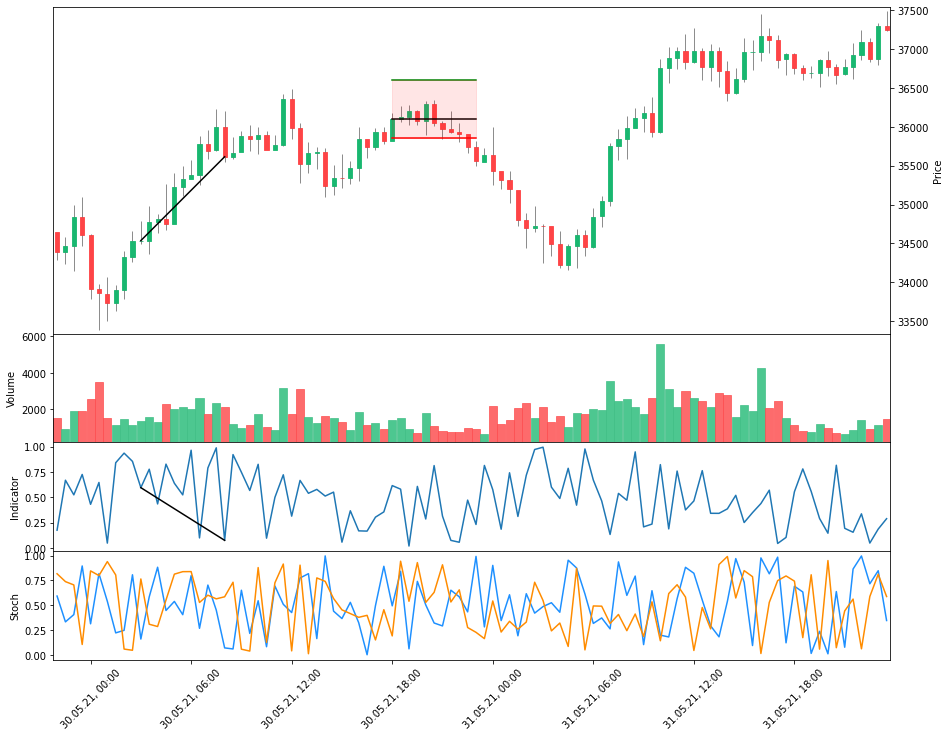

In [6]:
fig, axes = mpl.pyplot.subplots(
    4, 1,
    figsize=(15, 12),
    gridspec_kw={'height_ratios': [3, 1, 1, 1], 'hspace': 0},
    sharex=True
)

# OHLC candlesticks
mpf.plot(
    fin_data,
    ax=axes[0],
    volume=axes[1],
    style='yahoo',
    type='candle',
    show_nontrading=True,
    tight_layout=True
)
# RSI
axes[2].plot(fin_data.index, fin_data['indicator'])
axes[2].set_ylabel('Indicator')
# Stochastic RSI
axes[3].plot(fin_data.index, fin_data['stoch_k'], color='dodgerblue')
axes[3].plot(fin_data.index, fin_data['stoch_d'], color='darkorange')
axes[3].set_ylabel('Stoch')

axes[3].xaxis.set_major_formatter(mpl.dates.DateFormatter('%d.%m.%y, %H:%M'))
axes[3].tick_params(axis='x', rotation=45)


# Draw divergence
divergence_timeframe = (fin_data.iloc[10].name, fin_data.iloc[20].name)

div_prices = (
    fin_data.loc[divergence_timeframe[0], 'close'],
    fin_data.loc[divergence_timeframe[1], 'close']
)
div_rsi = (
    fin_data.loc[divergence_timeframe[0], 'indicator'],
    fin_data.loc[divergence_timeframe[1], 'indicator']
)

axes[0].plot( # Divergence line on price plot
    (mpl.dates.date2num(divergence_timeframe[0]), mpl.dates.date2num(divergence_timeframe[1])),
    (div_prices[0], div_prices[1]),
    color='black'
)
axes[2].plot( # Divergence line on RSI plot
    (mpl.dates.date2num(divergence_timeframe[0]), mpl.dates.date2num(divergence_timeframe[1])),
    (div_rsi[0], div_rsi[1]),
    color='black'
)

# Draw trade
entry_time = mpl.dates.date2num(fin_data.iloc[40].name)
entry_price = fin_data.iloc[40]['close']
take_profit = entry_price + 500
stop_loss = entry_price - 250
exit_time = mpl.dates.date2num(fin_data.iloc[50].name)
win = False

axes[0].plot((entry_time, exit_time), (entry_price, entry_price), color='black') # Entry price
axes[0].plot((entry_time, exit_time), (take_profit, take_profit), color='green') # Take profit
axes[0].plot((entry_time, exit_time), (stop_loss, stop_loss), color='red') # Stop loss
axes[0].add_patch( # Background rectangle
    mpl.patches.Rectangle(
        xy=(entry_time, stop_loss),
        width=exit_time-entry_time,
        height=take_profit-stop_loss,
        color='green' if win else 'red',
        alpha=0.1,
        zorder=10
    )
)

In [12]:
from src.models.strategies import RSIStoch200EMAResults

btcusdt['ema'] = np.random.normal(loc=4150, scale=50, size=btcusdt.shape[0])
btcusdt['rsi'] = np.random.uniform(low=0, high=1, size=btcusdt.shape[0])
btcusdt['stoch_k'] = np.random.uniform(low=0, high=1, size=btcusdt.shape[0])
btcusdt['stoch_d'] = np.random.uniform(low=0, high=1, size=btcusdt.shape[0])

results = RSIStoch200EMAResults(
    asset_name='BTCUSDT',
    ohlcv_timeseries=btcusdt
)

In [13]:
start_time=btcusdt.index[0]
end_time=btcusdt.index[100]

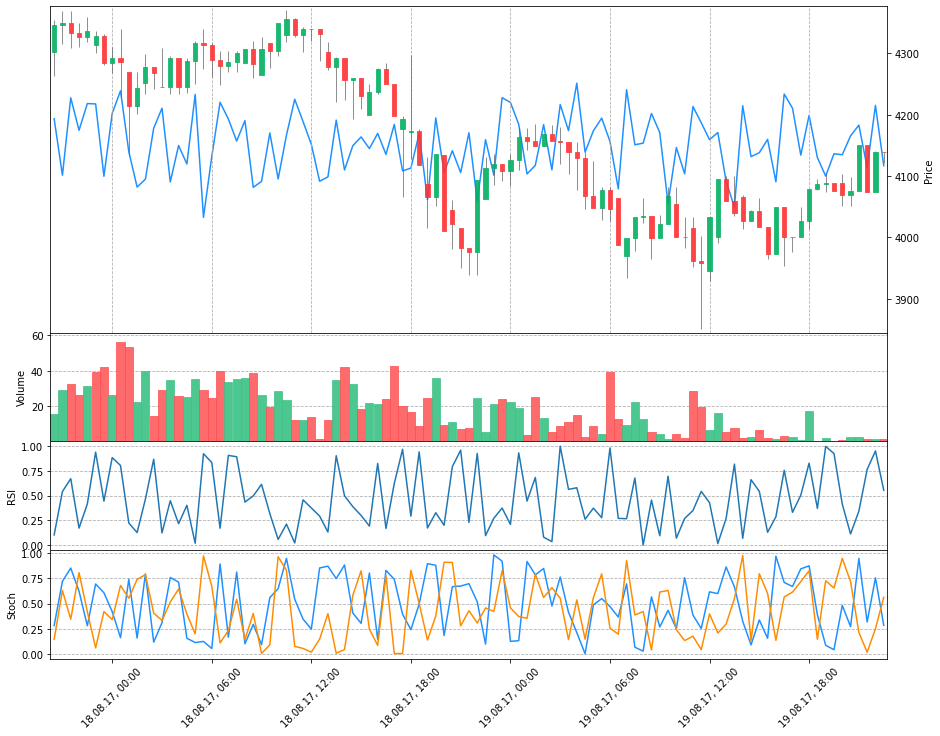

In [14]:
results.plot(start_time, end_time)

In [5]:
entry_time = btcusdt.index[60]
entry_price = btcusdt.loc[entry_time]['close']
take_profit = entry_price + 100
stop_loss = entry_price - 50
exit_time = btcusdt.index[80]
win = False
divergence_timeframe = (btcusdt.index[40], btcusdt.index[55])

In [6]:
entry_time = btcusdt.index[60]
entry_price = btcusdt.loc[entry_time]['close']
take_profit = entry_price + 100
stop_loss = entry_price - 50
exit_time = btcusdt.index[80]
win = False
divergence_timeframe = (btcusdt.index[40], btcusdt.index[55])
results.add_trade_and_signal(
    entry_time=entry_time,
    entry_price=entry_price,
    take_profit=take_profit,
    stop_loss=stop_loss,
    exit_time=exit_time,
    win=win,
    divergence_timeframe=divergence_timeframe
)

entry_time = btcusdt.index[30]
entry_price = btcusdt.loc[entry_time]['close']
take_profit = entry_price + 100
stop_loss = entry_price - 50
exit_time = btcusdt.index[40]
win = False
divergence_timeframe = (btcusdt.index[10], btcusdt.index[20])
results.add_trade_and_signal(
    entry_time=entry_time,
    entry_price=entry_price,
    take_profit=take_profit,
    stop_loss=stop_loss,
    exit_time=exit_time,
    win=win,
    divergence_timeframe=divergence_timeframe
)

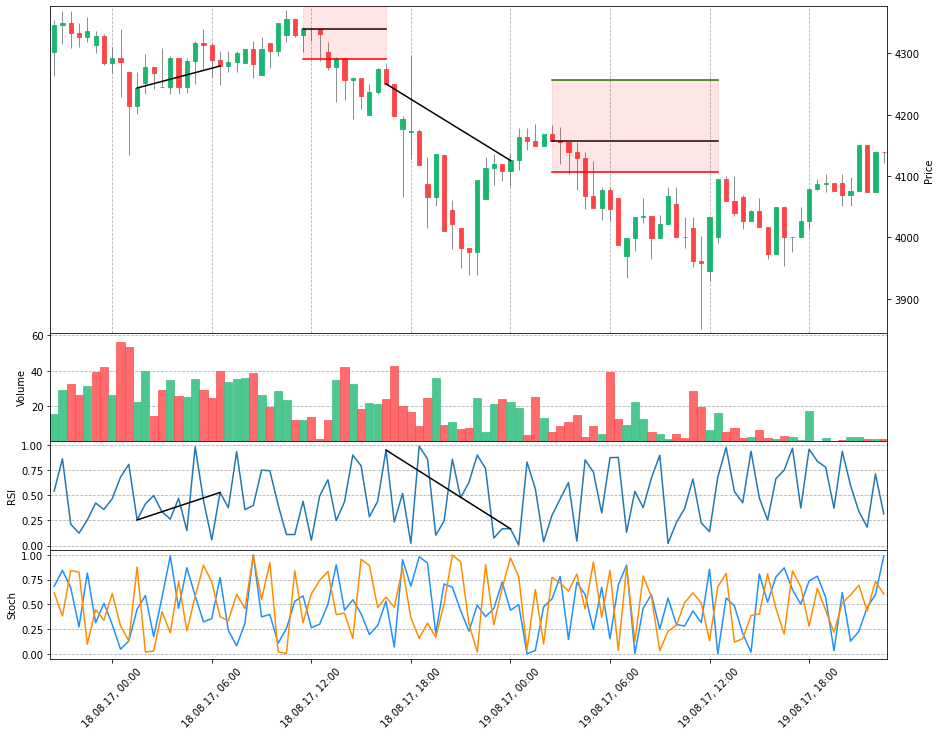

In [7]:
results.plot(start_time, end_time)